In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('brazilian-malware.csv')
df

,BaseOfCode,BaseOfData,Characteristics,DllCharacteristics,Entropy,FileAlignment,FirstSeenDate,Identify,ImageBase,ImportedDlls,...,PointerToSymbolTable,SHA1,Size,SizeOfCode,SizeOfHeaders,SizeOfImage,SizeOfInitializedData,SizeOfOptionalHeader,SizeOfUninitializedData,TimeDateStamp
0,4096,69632,783,0,5.981249,512,1970-01-01,powerbasic/win 8.00,4194304,comdlg32.dll gdi32.dll kernel32.dll ole32.dll ...,...,0,b0068836a40e6a43c6b546fcb709237e5aa223d1,76288,64855,1024,86016,2560,224,1500,12345
1,4096,1851392,783,0,6.081747,512,1970-01-01,NaN,4194304,comctl32.dll comdlg32.dll gdi32.dll kernel32.d...,...,0,5741708cd785f13b44267883e3f2fd2fa51fc23f,2558464,1843888,1024,2600960,500348,224,21476,0
2,4096,40960,783,0,5.586422,512,1970-01-01,NaN,4194304,comdlg32.dll kernel32.dll msvcrt.dll msvcrt.dl...,...,0,507fe5d8244f33d29d427468efca4ce406f23666,178688,33792,1024,33759232,177664,224,33557504,0
3,1359872,2138112,783,0,7.969464,512,1970-01-01,"upx 2.93 - 3.00 [lzma] -> markus oberhumer, la...",4194304,kernel32.dll advapi32.dll comdlg32.dll gdi32.d...,...,0,e51a7811464be1acadf6e72ba3a66aba0da438cd,806816,778240,4096,2166784,28672,224,1355776,0
4,4096,40960,783,32768,7.999900,512,1970-01-01,NaN,4194304,advapi32.dll comctl32.dll gdi32.dll kernel32.d...,...,0,0e046d9903c313ffeeb0d6392335437fe881b1f5,50689096,35840,1024,303104,38912,224,110080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50176,4096,40960,783,34112,7.999296,512,2024-06-04,NaN,4194304,advapi32.dll comctl32.dll gdi32.dll kernel32.d...,...,0,61db8d2697de093be2832a3464efb6b077cd030e,10871120,36864,1024,409600,39424,224,131072,1717527397
50177,6496256,7028736,33167,0,7.967026,512,2026-12-07,"upx 2.93 - 3.00 [lzma] -> markus oberhumer, la...",4194304,kernel32.dll comctl32.dll user32.dll,...,0,0e98493b4b34ed7665c98d29abdd2053f42e6063,560760,532480,4096,7053312,24576,224,6492160,1796621651
50178,4096,126976,271,0,7.964955,4096,2031-05-20,microsoft visual c++ v6.0 microsoft visual c++...,4194304,version.dll shell32.dll comctl32.dll kernel32....,...,0,9d1648ea8a624951f5475cd4c8e5a02600731691,13308611,122880,4096,229376,98304,224,0,1937076841
50179,4096,94208,33166,0,7.904448,512,2056-03-09,borland c++ for win32 1995 borland c++ borland...,4194304,kernel32.dll gdi32.dll user32.dll,...,0,c73e3818ae03b44c62d9c591ad1e16ea4c325380,793259,90112,1024,147456,36864,224,0,2719820994


In [10]:
columns = df.columns
print(columns)
for column in columns:
    print(column)
    print(df[column].value_counts(dropna=False))

Index(['BaseOfCode', 'BaseOfData', 'Characteristics', 'DllCharacteristics',
       'Entropy', 'FileAlignment', 'FirstSeenDate', 'Identify', 'ImageBase',
       'ImportedDlls', 'ImportedSymbols', 'Label', 'Machine', 'Magic',
       'NumberOfRvaAndSizes', 'NumberOfSections', 'NumberOfSymbols', 'PE_TYPE',
       'PointerToSymbolTable', 'SHA1', 'Size', 'SizeOfCode', 'SizeOfHeaders',
       'SizeOfImage', 'SizeOfInitializedData', 'SizeOfOptionalHeader',
       'SizeOfUninitializedData', 'TimeDateStamp'],
      dtype='object')
BaseOfCode
4096        40229
8192         5674
2101248       198
1024           84
1152           81
            ...  
5013504         1
4456448         1
5439488         1
1835008         1
13291520        1
Name: BaseOfCode, Length: 665, dtype: int64
BaseOfData
16384       1604
28672       1587
45056       1358
73728       1214
32768       1201
            ... 
48390144       1
15273984       1
5402624        1
3088384        1
4911104        1
Name: BaseOfData, Leng

570880      735
65024       587
526336      563
24576       470
40448       458
           ... 
2079232       1
43577344      1
3739648       1
275913        1
1059328       1
Name: SizeOfCode, Length: 5431, dtype: int64
SizeOfHeaders
1024     35954
4096      9805
512       3683
1536       558
1152        81
2048        55
1280        21
1104         9
1064         7
768          3
50176        1
20480        1
8192         1
896          1
640          1
Name: SizeOfHeaders, dtype: int64
SizeOfImage
32768       1356
81920       1050
40960        854
49152        683
57344        600
            ... 
13340672       1
17055744       1
13529088       1
35684352       1
13442972       1
Name: SizeOfImage, Length: 3408, dtype: int64
SizeOfInitializedData
8192        3005
2048        2239
4096        1473
12288        838
17920        667
            ... 
4069888        1
498236         1
4812800        1
872448         1
14026719       1
Name: SizeOfInitializedData, Length: 4728, dtype: in

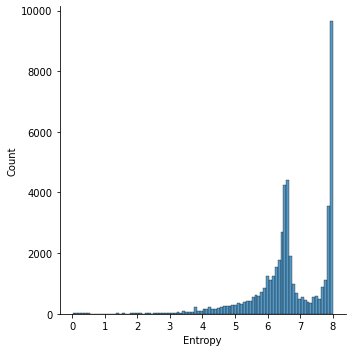

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df['Entropy'])
plt.show()


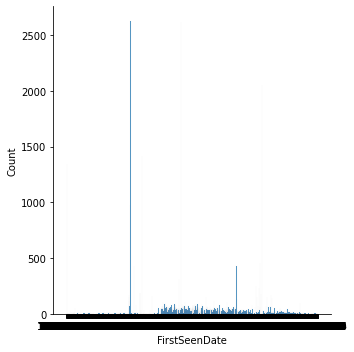

In [13]:
sns.displot(df['FirstSeenDate'])
plt.show()

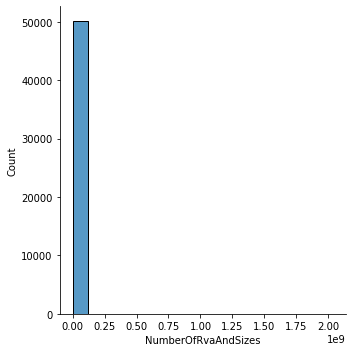

In [14]:
sns.displot(df['NumberOfRvaAndSizes'])
plt.show()

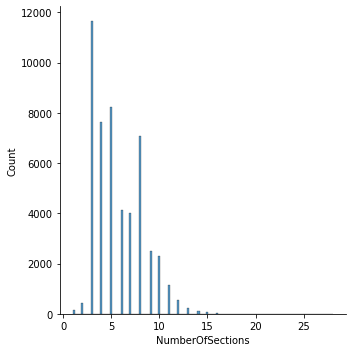

In [15]:
sns.displot(df['NumberOfSections'])
plt.show()

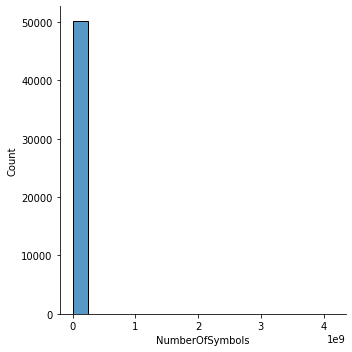

In [16]:
sns.displot(df['NumberOfSymbols'])
plt.show()

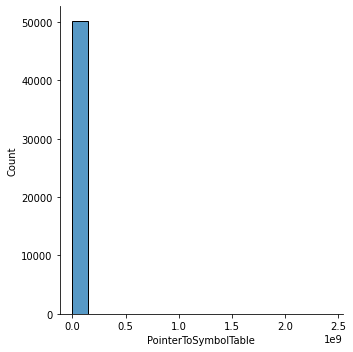

In [17]:
sns.displot(df['PointerToSymbolTable'])
plt.show()

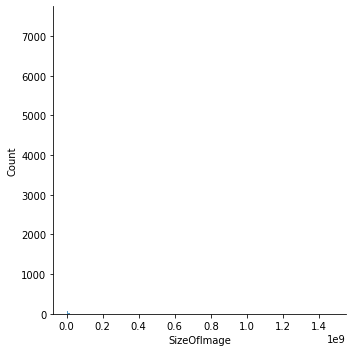

In [18]:
sns.displot(df['SizeOfImage'])
plt.show()

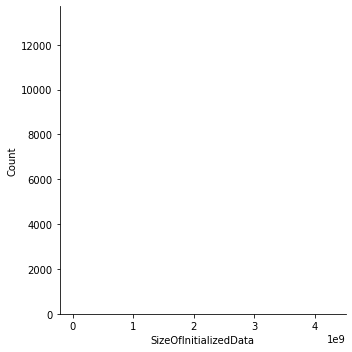

In [19]:
sns.displot(df['SizeOfInitializedData'])
plt.show()

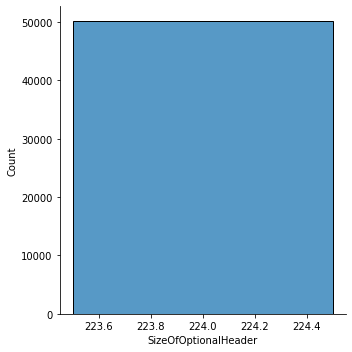

In [20]:
sns.displot(df['SizeOfOptionalHeader'])
plt.show()

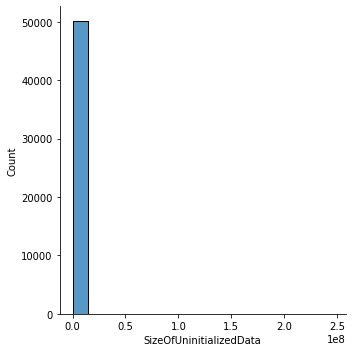

In [21]:
sns.displot(df['SizeOfUninitializedData'])
plt.show()

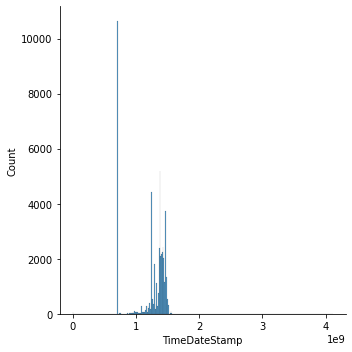

In [22]:
sns.displot(df['TimeDateStamp'])
plt.show()

In [23]:
# Области однородности для Entropy
ObbOdn1_Entropy = []
ObbOdn2_Entropy = []
ObbOdn3_Entropy = []
ObbOdn4_Entropy = []
ObbOdn5_Entropy = []
ObbOdn6_Entropy = []
ObbOdn7_Entropy = []
ObbOdn8_Entropy = []
ObbOdn9_Entropy = []
ObbOdn10_Entropy = []
ObbOdn11_Entropy = []
ObbOdn12_Entropy = []
ObbOdn13_Entropy = []
ObbOdn14_Entropy = []
ObbOdn15_Entropy = []
ObbOdn16_Entropy = []
ObbOdn17_Entropy = []
ObbOdn18_Entropy = []
ObbOdn19_Entropy = []
ObbOdn20_Entropy = []
for oblodn in df['Entropy']:
    if oblodn <= 0.85:
        ObbOdn1_Entropy.append(oblodn)
    if oblodn > 0.85 and oblodn <= 1.209:
        ObbOdn2_Entropy.append(oblodn)
    if oblodn > 1.209 and oblodn <= 1.475:
        ObbOdn3_Entropy.append(oblodn)
    if oblodn > 1.475 and oblodn <= 1.645:
        ObbOdn4_Entropy.append(oblodn)
    if oblodn > 1.645 and oblodn <= 2.185:
        ObbOdn5_Entropy.append(oblodn)
    if oblodn > 2.185 and oblodn <= 2.45:
        ObbOdn6_Entropy.append(oblodn)
    if oblodn > 2.45 and oblodn <= 2.985:
        ObbOdn7_Entropy.append(oblodn)
    if oblodn > 2.985 and oblodn <= 3.335:
        ObbOdn8_Entropy.append(oblodn)
    if oblodn > 3.335 and oblodn <= 3.515:
        ObbOdn9_Entropy.append(oblodn)
    if oblodn > 3.515 and oblodn <= 3.69:
        ObbOdn10_Entropy.append(oblodn)
    if oblodn > 3.69 and oblodn <= 3.865:
        ObbOdn11_Entropy.append(oblodn)
    if oblodn > 3.865 and oblodn <= 3.9:
        ObbOdn12_Entropy.append(oblodn)
    if oblodn > 3.9 and oblodn <= 4.755:
        ObbOdn13_Entropy.append(oblodn)
    if oblodn > 4.755 and oblodn <= 5.195:
        ObbOdn14_Entropy.append(oblodn)
    if oblodn > 5.195 and oblodn <= 5.465:
        ObbOdn15_Entropy.append(oblodn)
    if oblodn > 5.465 and oblodn <= 5.735:
        ObbOdn16_Entropy.append(oblodn)
    if oblodn > 5.735 and oblodn <= 6.085:
        ObbOdn17_Entropy.append(oblodn)
    if oblodn > 6.085 and oblodn <= 6.975:
        ObbOdn18_Entropy.append(oblodn)
    if oblodn > 6.975 and oblodn <= 7.33:
        ObbOdn19_Entropy.append(oblodn)
    if oblodn > 7.33 and oblodn <= 7.595:
        ObbOdn20_Entropy.append(oblodn)

In [38]:
# Математическое ожидание для Entropy
mean1_Entropy = np.mean(ObbOdn1_Entropy)
print(mean1_Entropy, "MEAN1_Entropy")
mean2_Entropy = np.mean(ObbOdn2_Entropy)
print(mean2_Entropy, "MEAN2_Entropy")
mean3_Entropy = np.mean(ObbOdn3_Entropy)
print(mean3_Entropy, "MEAN3_Entropy")
mean4_Entropy = np.mean(ObbOdn4_Entropy)
print(mean4_Entropy, "MEAN4_Entropy")
mean5_Entropy = np.mean(ObbOdn5_Entropy)
print(mean5_Entropy, "MEAN5_Entropy")
mean6_Entropy = np.mean(ObbOdn6_Entropy)
print(mean6_Entropy, "MEAN6_Entropy")
mean7_Entropy = np.mean(ObbOdn7_Entropy)
print(mean7_Entropy, "MEAN7_Entropy")
mean8_Entropy = np.mean(ObbOdn8_Entropy)
print(mean8_Entropy, "MEAN8_Entropy")
mean9_Entropy = np.mean(ObbOdn9_Entropy)
print(mean9_Entropy, "MEAN9_Entropy")
mean10_Entropy = np.mean(ObbOdn10_Entropy)
print(mean10_Entropy, "MEAN10_Entropy")
mean11_Entropy = np.mean(ObbOdn11_Entropy)
print(mean11_Entropy, "MEAN11_Entropy")
mean12_Entropy = np.mean(ObbOdn12_Entropy)
print(mean12_Entropy, "MEAN12_Entropy")
mean13_Entropy = np.mean(ObbOdn13_Entropy)
print(mean13_Entropy, "MEAN13_Entropy")
mean14_Entropy = np.mean(ObbOdn14_Entropy)
print(mean14_Entropy, "MEAN14_Entropy")
mean15_Entropy = np.mean(ObbOdn15_Entropy)
print(mean15_Entropy, "MEAN15_Entropy")
mean16_Entropy = np.mean(ObbOdn16_Entropy)
print(mean16_Entropy, "MEAN16_Entropy")
mean17_Entropy = np.mean(ObbOdn17_Entropy)
print(mean17_Entropy, "MEAN17_Entropy")
mean18_Entropy = np.mean(ObbOdn18_Entropy)
print(mean18_Entropy, "MEAN18_Entropy")
mean19_Entropy = np.mean(ObbOdn19_Entropy)
print(mean19_Entropy, "MEAN19_Entropy")
mean20_Entropy = np.mean(ObbOdn20_Entropy)
print(mean20_Entropy, "MEAN20_Entropy")

0.2628988715674334 MEAN1_Entropy
1.05070324418736 MEAN2_Entropy
1.3845594693836583 MEAN3_Entropy
1.5785017052446353 MEAN4_Entropy
1.9455243192598097 MEAN5_Entropy
2.322369648472888 MEAN6_Entropy
2.714704337820672 MEAN7_Entropy
3.2087604775081306 MEAN8_Entropy
3.434729854835773 MEAN9_Entropy
3.59466588298136 MEAN10_Entropy
3.777542269252467 MEAN11_Entropy
3.8840580616545135 MEAN12_Entropy
4.388923607095958 MEAN13_Entropy
4.988208641424958 MEAN14_Entropy
5.334847657771998 MEAN15_Entropy
5.609694418256964 MEAN16_Entropy
5.934874177515363 MEAN17_Entropy
6.520483941629802 MEAN18_Entropy
7.141258357358207 MEAN19_Entropy
7.470988854687993 MEAN20_Entropy


In [39]:
# Среднеквадратическое отклонение для Entropy
std1_Entropy = np.std(ObbOdn1_Entropy)
print(std1_Entropy)
std2_Entropy = np.std(ObbOdn2_Entropy)
print(std2_Entropy)
std3_Entropy = np.std(ObbOdn3_Entropy)
print(std3_Entropy)
std4_Entropy = np.std(ObbOdn4_Entropy)
print(std4_Entropy)
std5_Entropy = np.std(ObbOdn5_Entropy)
print(std5_Entropy)
std6_Entropy = np.std(ObbOdn6_Entropy)
print(std6_Entropy)
std7_Entropy = np.std(ObbOdn7_Entropy)
print(std7_Entropy)
std8_Entropy = np.std(ObbOdn8_Entropy)
print(std8_Entropy)
std9_Entropy = np.std(ObbOdn9_Entropy)
print(std9_Entropy)
std10_Entropy = np.std(ObbOdn10_Entropy)
print(std10_Entropy)
std11_Entropy = np.std(ObbOdn11_Entropy)
print(std11_Entropy)
std12_Entropy = np.std(ObbOdn12_Entropy)
print(std12_Entropy)
std13_Entropy = np.std(ObbOdn13_Entropy)
print(std13_Entropy)
std14_Entropy = np.std(ObbOdn14_Entropy)
print(std14_Entropy)
std15_Entropy = np.std(ObbOdn15_Entropy)
print(std15_Entropy)
std16_Entropy = np.std(ObbOdn16_Entropy)
print(std16_Entropy)
std17_Entropy = np.std(ObbOdn17_Entropy)
print(std17_Entropy)
std18_Entropy = np.std(ObbOdn18_Entropy)
print(std18_Entropy)
std19_Entropy = np.std(ObbOdn19_Entropy)
print(std19_Entropy)
std20_Entropy = np.std(ObbOdn20_Entropy)
print(std20_Entropy)

0.18541957368339876
0.09308055850150627
0.06239859808786392
0.03611518474074364
0.12304562313664143
0.062131042384753664
0.12106273674537926
0.09754625545757997
0.0425288852814761
0.04903003140793771
0.03384983240991729
0.008598677933103921
0.2409839338917528
0.1276542753942098
0.07595613353326086
0.07629712293827265
0.09784344245215533
0.1913941755975827
0.09867984219220237
0.07092749107781324


In [40]:
# Отрицательный доверительный интервал для Entropy
otric_dover_int_Entropy_1 = mean1_Entropy - 3 * std1_Entropy
print(otric_dover_int_Entropy_1)
otric_dover_int_Entropy_2 = mean2_Entropy - 3 * std2_Entropy
print(otric_dover_int_Entropy_2)
otric_dover_int_Entropy_3 = mean3_Entropy - 3 * std3_Entropy
print(otric_dover_int_Entropy_3)
otric_dover_int_Entropy_4 = mean4_Entropy - 3 * std4_Entropy
print(otric_dover_int_Entropy_4)
otric_dover_int_Entropy_5 = mean5_Entropy - 3 * std5_Entropy
print(otric_dover_int_Entropy_5)
otric_dover_int_Entropy_6 = mean6_Entropy - 3 * std6_Entropy
print(otric_dover_int_Entropy_6)
otric_dover_int_Entropy_7 = mean7_Entropy - 3 * std7_Entropy
print(otric_dover_int_Entropy_7)
otric_dover_int_Entropy_8 = mean8_Entropy - 3 * std8_Entropy
print(otric_dover_int_Entropy_8)
otric_dover_int_Entropy_9 = mean9_Entropy - 3 * std9_Entropy
print(otric_dover_int_Entropy_9)
otric_dover_int_Entropy_10 = mean10_Entropy - 3 * std10_Entropy
print(otric_dover_int_Entropy_10)
otric_dover_int_Entropy_11 = mean11_Entropy - 3 * std11_Entropy
print(otric_dover_int_Entropy_11)
otric_dover_int_Entropy_12 = mean12_Entropy - 3 * std12_Entropy
print(otric_dover_int_Entropy_12)
otric_dover_int_Entropy_13 = mean13_Entropy - 3 * std13_Entropy
print(otric_dover_int_Entropy_13)
otric_dover_int_Entropy_14 = mean14_Entropy - 3 * std14_Entropy
print(otric_dover_int_Entropy_14)
otric_dover_int_Entropy_15 = mean15_Entropy - 3 * std15_Entropy
print(otric_dover_int_Entropy_15)
otric_dover_int_Entropy_16 = mean16_Entropy - 3 * std16_Entropy
print(otric_dover_int_Entropy_16)
otric_dover_int_Entropy_17 = mean17_Entropy - 3 * std17_Entropy
print(otric_dover_int_Entropy_17)
otric_dover_int_Entropy_18 = mean18_Entropy - 3 * std18_Entropy
print(otric_dover_int_Entropy_18)
otric_dover_int_Entropy_19 = mean19_Entropy - 3 * std19_Entropy
print(otric_dover_int_Entropy_19)
otric_dover_int_Entropy_20 = mean20_Entropy - 3 * std20_Entropy
print(otric_dover_int_Entropy_20)

-0.29335984948276284
0.7714615686828412
1.1973636751200665
1.4701561510224044
1.5763874498498853
2.135976521318627
2.351516127584534
2.916121711135391
3.307143198991345
3.447575788757547
3.675992772022715
3.8582620278552016
3.6659718054206993
4.605245815242329
5.106979257172215
5.380803049442147
5.641343850158897
5.946301414837054
6.8452188307816
7.258206381454553


In [41]:
# Положительный доверительный интервал для Entropy
poloj_dover_int_Entropy_1 = mean1_Entropy +  3 * std1_Entropy
print(poloj_dover_int_Entropy_1)
poloj_dover_int_Entropy_2 = mean2_Entropy +  3 * std2_Entropy
print(poloj_dover_int_Entropy_2)
poloj_dover_int_Entropy_3 = mean3_Entropy +  3 * std3_Entropy
print(poloj_dover_int_Entropy_3)
poloj_dover_int_Entropy_4 = mean4_Entropy +  3 * std4_Entropy
print(poloj_dover_int_Entropy_4)
poloj_dover_int_Entropy_5 = mean5_Entropy +  3 * std5_Entropy
print(poloj_dover_int_Entropy_5)
poloj_dover_int_Entropy_6 = mean6_Entropy +  3 * std6_Entropy
print(poloj_dover_int_Entropy_6)
poloj_dover_int_Entropy_7 = mean7_Entropy +  3 * std7_Entropy
print(poloj_dover_int_Entropy_7)
poloj_dover_int_Entropy_8 = mean8_Entropy +  3 * std8_Entropy
print(poloj_dover_int_Entropy_8)
poloj_dover_int_Entropy_9 = mean9_Entropy +  3 * std9_Entropy
print(poloj_dover_int_Entropy_9)
poloj_dover_int_Entropy_10 = mean10_Entropy +  3 * std10_Entropy
print(poloj_dover_int_Entropy_10)
poloj_dover_int_Entropy_11 = mean11_Entropy +  3 * std11_Entropy
print(poloj_dover_int_Entropy_11)
poloj_dover_int_Entropy_12 = mean12_Entropy +  3 * std12_Entropy
print(poloj_dover_int_Entropy_12)
poloj_dover_int_Entropy_13 = mean13_Entropy +  3 * std13_Entropy
print(poloj_dover_int_Entropy_13)
poloj_dover_int_Entropy_14 = mean14_Entropy +  3 * std14_Entropy
print(poloj_dover_int_Entropy_14)
poloj_dover_int_Entropy_15 = mean15_Entropy +  3 * std15_Entropy
print(poloj_dover_int_Entropy_15)
poloj_dover_int_Entropy_16 = mean16_Entropy +  3 * std16_Entropy
print(poloj_dover_int_Entropy_16)
poloj_dover_int_Entropy_17 = mean17_Entropy +  3 * std17_Entropy
print(poloj_dover_int_Entropy_17)
poloj_dover_int_Entropy_18 = mean18_Entropy +  3 * std18_Entropy
print(poloj_dover_int_Entropy_18)
poloj_dover_int_Entropy_19 = mean19_Entropy +  3 * std19_Entropy
print(poloj_dover_int_Entropy_19)
poloj_dover_int_Entropy_20 = mean20_Entropy +  3 * std20_Entropy
print(poloj_dover_int_Entropy_20)

0.8191575926176297
1.329944919691879
1.57175526364725
1.6868472594668662
2.314661188669734
2.508762775627149
3.07789254805681
3.5013992438808703
3.5623165106802013
3.741755977205173
3.879091766482219
3.9098540954538255
5.111875408771216
5.371171467607587
5.56271605837178
5.838585787071782
6.228404504871829
7.094666468422551
7.437297883934813
7.683771327921432


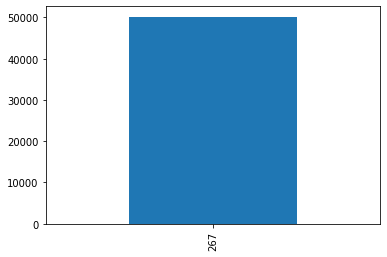

In [37]:
plt.figure()
df['PE_TYPE'].value_counts().plot.bar()
plt.show()

In [53]:
# Всё о NumberOfRvaAndSizes
mean_NORAS = np.mean(df['NumberOfRvaAndSizes'])
print(mean_NORAS, "MEAN_NumberOfRvaAndSizes")
std_NORAS = np.std(df['NumberOfRvaAndSizes'])
print(std_NORAS, "STD_NumberOfRvaAndSizes")
otric_dover_int_NORAS = mean_NORAS - 3 * std_NORAS
print(otric_dover_int_NORAS, "Otric_NumberOfRvaAndSizes")
poloj_dover_int_NORAS = mean_NORAS +  3 * std_NORAS
print(poloj_dover_int_NORAS, "Poloj_NumberOfRvaAndSizes")

511829.5531575696 MEAN_NumberOfRvaAndSizes
26157948.807495944 STD_NumberOfRvaAndSizes
-77962016.86933026 Otric_NumberOfRvaAndSizes
78985675.9756454 Poloj_NumberOfRvaAndSizes


In [54]:
# Всё о NumberOfSymbols
mean_NOS = np.mean(df['NumberOfSymbols'])
print(mean_NOS, "MEAN_NumberOfSymbols")
std_NOS = np.std(df['NumberOfSymbols'])
print(std_NOS, "STD_NumberOfSymbols")
otric_dover_int_NOS = mean_NOS - 3 * std_NOS
print(otric_dover_int_NOS, "Otric_NumberOfSymbols")
poloj_dover_int_NOS = mean_NOS +  3 * std_NOS
print(poloj_dover_int_NOS, "Poloj_NumberOfSymbols")

179158.6832067914 MEAN_NumberOfSymbols
22462561.253492396 STD_NumberOfSymbols
-77962016.86933026 Otric_NumberOfSymbols
67566842.44368398 Poloj_NumberOfSymbols


In [59]:
# Всё о PointerToSymbolTable
mean_PTST = np.mean(df['PointerToSymbolTable'])
print(mean_PTST, "MEAN_PointerToSymbolTable")
std_PTST = np.std(df['PointerToSymbolTable'])
print(std_PTST, "STD_PointerToSymbolTable")
otric_dover_int_PTST = mean_PTST - 3 * std_PTST
print(otric_dover_int_PTST, "Otric_PointerToSymbolTable")
poloj_dover_int_PTST = mean_PTST +  3 * std_PTST
print(poloj_dover_int_PTST, "Poloj_PointerToSymbolTable")

551384.5048325063 MEAN_PointerToSymbolTable
33896582.029564865 STD_PointerToSymbolTable
-101138361.5838621 Otric_PointerToSymbolTable
102241130.59352711 Poloj_PointerToSymbolTable


In [58]:
# Всё о SizeOfOptionalHeader
mean_SOOH = np.mean(df['SizeOfOptionalHeader'])
print(mean_SOOH, "MEAN_SizeOfOptionalHeader")
std_SOOH = np.std(df['SizeOfOptionalHeader'])
print(std_SOOH, "STD_SizeOfOptionalHeader")
otric_dover_int_SOOH = mean_SOOH - 3 * std_SOOH
print(otric_dover_int_SOOH, "Otric_SizeOfOptionalHeader")
poloj_dover_int_SOOH = mean_SOOH +  3 * std_SOOH
print(poloj_dover_int_SOOH, "Poloj_SizeOfOptionalHeader")

224.0 MEAN_SizeOfOptionalHeader
0.0 STD_SizeOfOptionalHeader
224.0 Otric_SizeOfOptionalHeader
224.0 Poloj_SizeOfOptionalHeader


In [60]:
# Всё о SizeOfUninitializedData
mean_SOUD = np.mean(df['SizeOfUninitializedData'])
print(mean_SOUD, "MEAN_SizeOfUninitializedData")
std_SOUD = np.std(df['SizeOfUninitializedData'])
print(std_SOUD, "STD_SizeOfUninitializedData")
otric_dover_int_SOUD = mean_SOUD - 3 * std_SOUD
print(otric_dover_int_SOUD, "Otric_SizeOfUninitializedData")
poloj_dover_int_SOUD = mean_SOUD +  3 * std_SOUD
print(poloj_dover_int_SOUD, "Poloj_SizeOfUninitializedData")

172890.51856280267 MEAN_SizeOfUninitializedData
3730788.3194097267 STD_SizeOfUninitializedData
-11019474.439666377 Otric_SizeOfUninitializedData
11365255.476791983 Poloj_SizeOfUninitializedData
